<a href="https://colab.research.google.com/github/YoonSungLee/University-Lectures/blob/master/DataMining/Chapter03_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%97%90%EC%84%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

<img src="https://i.imgur.com/4z43FPg.jpg" width="100%">

<img src="https://i.imgur.com/jMgd2Gj.jpg" width="100%">

In [0]:
x = [1, 2, 3]
y = [1, 3, 2]
n = len(x)

xbar = sum(x)/n
ybar = sum(y)/n

sumxx = sumxy = 0
for i in range(n):
    sumxx += (x[i] - xbar)**2
    sumxy += (x[i] - xbar) * (y[i] - ybar)

beta = sumxy/sumxx
alpha = ybar - beta * xbar

print(alpha, beta)

1.0 0.5


# Linear Regression: 행렬일경우

<img src="https://i.imgur.com/cQ2tIkc.jpg" width="100%">

<img src="https://i.imgur.com/1KtWzHr.jpg" width="100%">

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

x = np.array([1,2,3])
y = np.array([1,2,3])

# 모형 정의
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_dim=1))    # input_dim=1: 1차원
sgd = tf.keras.optimizers.SGD(0.01)         # learning_rate = 0.01
model.compile(optimizer=sgd,loss='mse')

# 학습
model.fit(x, y, epochs=1000, verbose = 2)

# 결과값 구하기
predicted = model.predict(x)

Epoch 1/1000
1/1 - 0s - loss: 6.2308
Epoch 2/1000
1/1 - 0s - loss: 4.9304
Epoch 3/1000
1/1 - 0s - loss: 3.9025
Epoch 4/1000
1/1 - 0s - loss: 3.0900
Epoch 5/1000
1/1 - 0s - loss: 2.4477
Epoch 6/1000
1/1 - 0s - loss: 1.9400
Epoch 7/1000
1/1 - 0s - loss: 1.5387
Epoch 8/1000
1/1 - 0s - loss: 1.2214
Epoch 9/1000
1/1 - 0s - loss: 0.9706
Epoch 10/1000
1/1 - 0s - loss: 0.7724
Epoch 11/1000
1/1 - 0s - loss: 0.6156
Epoch 12/1000
1/1 - 0s - loss: 0.4917
Epoch 13/1000
1/1 - 0s - loss: 0.3937
Epoch 14/1000
1/1 - 0s - loss: 0.3162
Epoch 15/1000
1/1 - 0s - loss: 0.2550
Epoch 16/1000
1/1 - 0s - loss: 0.2065
Epoch 17/1000
1/1 - 0s - loss: 0.1682
Epoch 18/1000
1/1 - 0s - loss: 0.1379
Epoch 19/1000
1/1 - 0s - loss: 0.1139
Epoch 20/1000
1/1 - 0s - loss: 0.0949
Epoch 21/1000
1/1 - 0s - loss: 0.0799
Epoch 22/1000
1/1 - 0s - loss: 0.0680
Epoch 23/1000
1/1 - 0s - loss: 0.0586
Epoch 24/1000
1/1 - 0s - loss: 0.0511
Epoch 25/1000
1/1 - 0s - loss: 0.0451
Epoch 26/1000
1/1 - 0s - loss: 0.0404
Epoch 27/1000
1/1 - 0

In [0]:
print(predicted)

[[1.0214925]
 [2.0046122]
 [2.9877317]]


# Logistic Regression

<img src="https://i.imgur.com/SP8K5XR.jpg" width="100%">

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sig(x):
    return 1/(1+np.exp(-x))

x = np.array([1,2,3,4,5,6])
y = np.array([0,0,0,1,1,1])
xy = np.array([[1,0],[2,0],[3,0],[4,1],[5,1],[6,1]])
n = 100
a = np.linspace(-5, 5, n)
b = np.linspace(-2.5, 2.5, n)
a, b = np.meshgrid(a, b)
cost1 = np.zeros((100, 100)) # cross entropy function
for val in xy:
    temp = -val[1] * np.log(sig(a+b*val[0])) - (1-val[1]) * np.log(1-sig(a+b*val[0]))
    cost1 += temp
cost2 = np.zeros((100, 100))
for val in xy:
    temp = (val[1]-sig(a+b*val[0]))**2 # error sums of squre function
    cost2 += temp

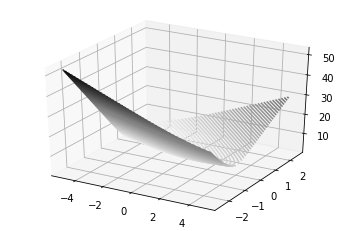

In [0]:
# cross entropy function

ax = plt.axes(projection='3d')
ax.contour3D(a, b, cost1, 100, cmap='binary')

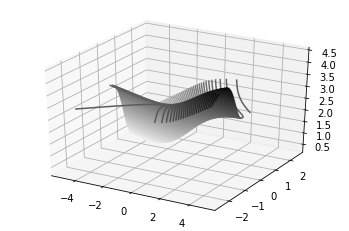

In [0]:
# error sums of squre function

ax = plt.axes(projection='3d')
ax.contour3D(a, b, cost2, 100, cmap='binary')

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

x=np.array([[2,1],
            [3,2],
            [3,4],
            [5,5],
            [7,5],
            [2,5]])
y = np.array([[0],[0],[0],[1],[1],[1]])

from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_dim=2))
model.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='binary_crossentropy')

model.fit(x, y, epochs=2000, verbose = 0)       # verbose = 0 : 출력 생략

predicted = model.predict(x)

In [0]:
print(predicted)

[[0.00409598]
 [0.0279151 ]
 [0.46990642]
 [0.88608336]
 [0.9247237 ]
 [0.79671127]]


# Gradient Descent Algorithm

이 알고리즘의 사용조건은 Cost Function이 Convex 해야한다. Logistic Regression 문제에서는 기존 MSE를 이용하게 되면 Convex한 Cost Function을 얻지 못하므로 Cross Entropy Function을 사용하는 것이다.

<img src="https://i.imgur.com/voiPtMR.jpg" width="100%">

In [0]:
w = 1
learn_rate = 0.1

for i in range(100):
    w = w - learn_rate * (2 * w)
    print(w)

0.8
0.64
0.512
0.4096
0.32768
0.26214400000000004
0.20971520000000005
0.16777216000000003
0.13421772800000004
0.10737418240000003
0.08589934592000002
0.06871947673600001
0.05497558138880001
0.04398046511104001
0.035184372088832
0.028147497671065603
0.02251799813685248
0.018014398509481985
0.014411518807585589
0.01152921504606847
0.009223372036854777
0.007378697629483821
0.005902958103587057
0.004722366482869646
0.0037778931862957168
0.0030223145490365735
0.002417851639229259
0.001934281311383407
0.0015474250491067257
0.0012379400392853806
0.0009903520314283045
0.0007922816251426436
0.000633825300114115
0.0005070602400912919
0.0004056481920730336
0.00032451855365842687
0.0002596148429267415
0.0002076918743413932
0.00016615349947311455
0.00013292279957849163
0.00010633823966279331
8.507059173023465e-05
6.805647338418771e-05
5.444517870735017e-05
4.3556142965880136e-05
3.4844914372704106e-05
2.7875931498163285e-05
2.230074519853063e-05
1.7840596158824504e-05
1.4272476927059604e-05
1.14179

# Normalization

* Standardization

<img src="https://i.imgur.com/Xxsxg2r.jpg" width="100%">

In [0]:
import numpy as np

x = [1,2,3,4,5,6,7,8,9,10]
n = len(x)
xbar = sum(x)/n

sumxx = 0
for i in range(n):
    sumxx += (x[i] - xbar)**2

variance = sumxx/(n-1)
std = np.sqrt(variance)

z = []
for i in range(n):
    zscore = (x[i] - xbar)/std
    z.append(zscore)

print(z)

[-1.4863010829205867, -1.1560119533826787, -0.8257228238447705, -0.49543369430686224, -0.1651445647689541, 0.1651445647689541, 0.49543369430686224, 0.8257228238447705, 1.1560119533826787, 1.4863010829205867]


In [0]:
# mean

print(sum(z)/n)

0.0


In [0]:
# std

print(np.std(z, ddof=1))    # ddof=1 : n-1로 나누는 설정(default: n으로 나누는 설정)

1.0


* MinMaxScaler

<img src="https://i.imgur.com/nWBY3H6.png" width="100%">

# MnistData

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
from tensorflow.keras import datasets

In [0]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
image = train_x[0]
image.shape

(28, 28)

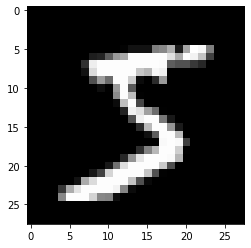

In [0]:
import matplotlib.pyplot as plt
plt.imshow(image, 'gray')
plt.show()

In [0]:
train_y.shape

(60000,)

In [0]:
train_y[0]

5

In [0]:
from tensorflow.keras.utils import to_categorical
to_categorical(1, 5) # 5개 중에 1번째가 핫~

array([0., 1., 0., 0., 0.], dtype=float32)

In [0]:
label = train_y[0]
label

5

In [0]:
to_categorical(label, 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

학습은 batch_size = 100, training_epochs = 5, learning_rate=0.001로 진행하자.<br><br>
Mnist 데이터셋은 6만 건의 Training set과 1만 건의 Test set으로 구성되어 있다. 이를 학습하는 것은 입력 X (6만 by 784) 에 weight를 곱하는 계산 방식이다. 문제는 6만 건을 이용하여 cost 함수를 한번 계산하고 최대경사법을 통해 weight를 한번 조정하는 것이
비효율적이라는 점이다.<br><br>
이 문제를 해결하기 위해 mini-batch(예: 100건) 단위로 Cost 및 Weight 계산을 수행하
는 것이다. 이 경우, 60000/100 = 600 번 반복하면 Full Data인 6만 건을 다 학습하게 된다. 6만 건의 Full Data를 학습하는 작업을 1 epoch라고 한다. 만약, 20 epoch 학습을 한다고 하면 600 * 20 = 12,000 번 Weight를 조정하는 것이다. 이는 주어진 데이터가 많을 때 적은 메모리를 사용하면서 더 정확한 추정을 하기 위한 방법이다.

# CrossEntropy

In [1]:
#CrossEntropy.py
import math
y=[0,1,1,0]
hypothesis=[0.3, 0.7, 0.6, 0.2]
sum=0.
for i in range(4):
    sum += -y[i]*math.log(hypothesis[i])-(1-y[i])*math.log(1-hypothesis[i])
crossEntropy=sum/4
print (crossEntropy)

y1Hot=[[1,0],[0,1],[0,1],[1,0]]
#hypothesis1Hot: [prob Y=0, prob Y=1]
hypothesis1Hot=[[0.7,0.3],[0.3,0.7],[0.4,0.6],[0.8,0.2]]
sum1=0.
for i in range(4):
    sum2=0.
    for j in range(2):
        sum2+=-y1Hot[i][j]*math.log(hypothesis1Hot[i][j])
    sum1+=sum2

crossEntropy1Hot=sum1/4
print (crossEntropy1Hot)

0.36182976573941633
0.36182976573941633


# Quiz

1. Galton이 사용한 데이터는?
  * 키

2. SSE는 무엇의 약자인가?
  * sums of squared error

1. Mnist 데이터의 크기는?
 * 784개
2. Mnist에서 배치사이즈 100개 에포크 5면 몇번 파라미터 갱신을 하는가?
 * 60000 / 100 * 5